<a href="https://colab.research.google.com/github/ZahrizhalAli/BitCoin_TimeSeries_with_TensorFlow_Experiments/blob/main/10_time_series_forecasting_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time series forecasting fundamentals with TensorFlow + BitPredict

**Note** This is not financial advice

Bitcoin prediction based on the historical data

##  Get Data

we're going to be using historical price of data of bitcointo try and predict the future price of bitcoin. We downloaded the data from here : https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-10-12 05:26:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2022-10-12 05:26:52 (9.60 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series data

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
#Lets read in our bitcoin data and parse the dates
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 
                 parse_dates=['Date'],
                 index_col=['Date']) #  parse the date column and tell pandas column 1 is a datetime

In [3]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
# How many samples do we have
len(df)

2787

In [5]:
#only wantt closing price for each day
bitcoin_prices =  pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)': 'Price'})

In [6]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


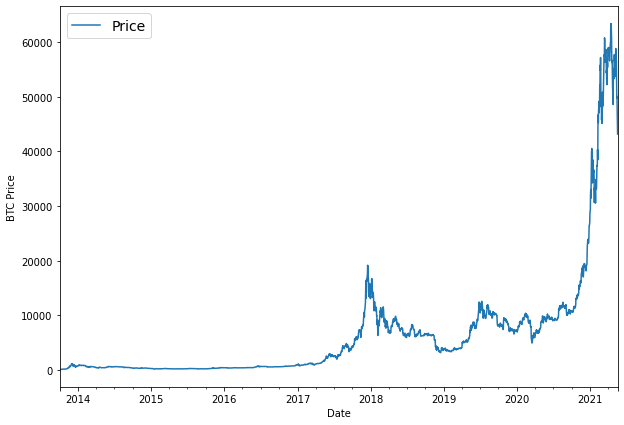

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.legend(fontsize=14)

## Importing time series with Python's CSV module

In [8]:
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=',') #format from csv
  next(csv_reader) #skips  the first line a.k.a the labels / headers
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the second labels a.k.a Date from csv
    btc_price.append(float(line[2])) # get closing price 

In [9]:
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

## Create train and test sets of our time series data (the wrong way)

In [10]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train, y_test = train_test_split(timesteps, 
                                                    prices, 
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

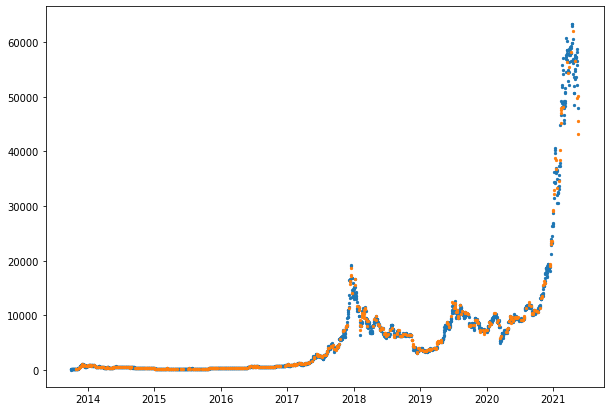

In [12]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.show()

## Create train and test split for time series (the right way)

In [13]:
# Creat train and test splits the right way tfor time series data
split_size = int(0.8 * len(prices)) # 80% train,

# create train data splits
X_train , y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]


len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

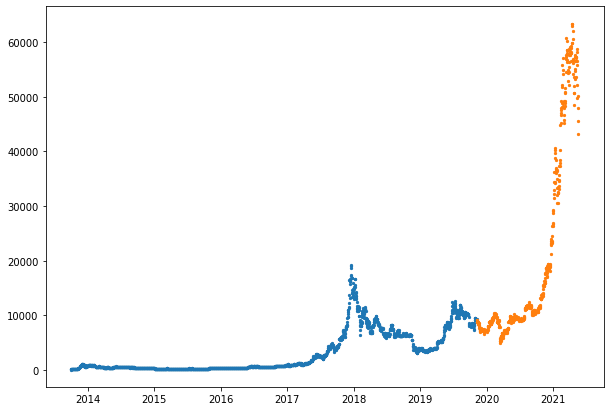

In [14]:
# Let's plot the right train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.show()

## Creating a plotting function

In [15]:


# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)



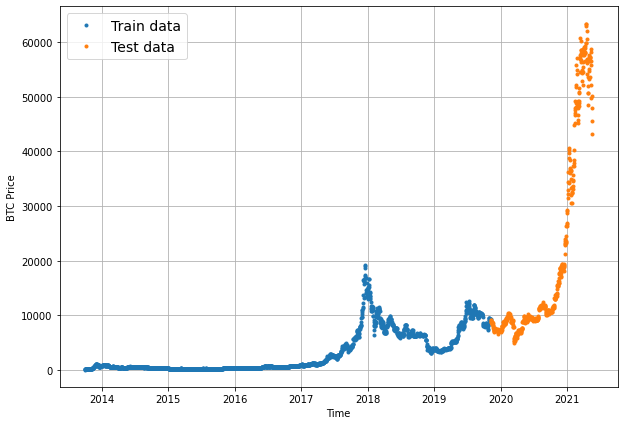

In [16]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments

We've got some bitcoin historical data, to model it let's run a series of modelling experiments to see which model performs best.

**Experiments**

* 0 Naive model
* 1 Dense model
* 2 Same as model 1
* 3 Same as model 1
* 4 Conv1D
* 5 LSTM (RNN)
* 6 Same as model 1 (but with multivariate data)
* 7 N-BEATS algorithm
* 8 Ensemble (multiple models stacked together)
* 9 Future prediction model
* 10 Same as model 1 (but with different data)

## Model 0 : Naive model forecasts (baseline)

$$\hat{y}_{t} = y_{t-1}$$

In English:
> The prediction at timestep t (y_hat) is equal to the value at timestep t-1 (previous timestep) - this is for horizon of 1

In [17]:
# Create a naive forecase
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

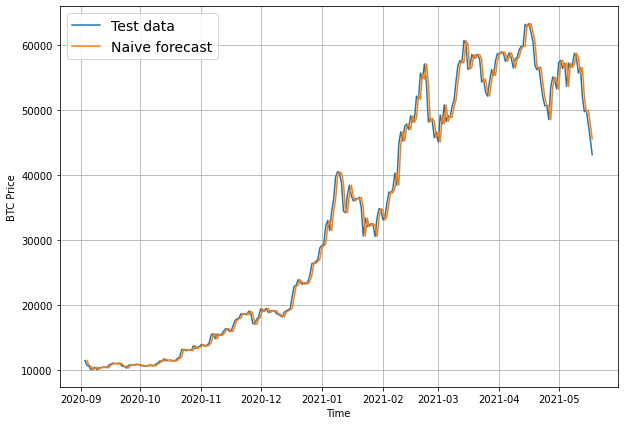

In [18]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, start= 300, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=300, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=300, format="-", label="Naive forecast");

## Evaluating a time series model

Some evaluation metrics for time series forecasting

What are we doing?

We're predicting a number means we have a form of a regression problem.

Because we're working on a regression.

A few common regression metrics (which can also be used for time series forecasting):
* MAE - Mean Absolute Error (on average prediction is this much different from this much true value)
* MSE - Mean Squared Error
* Huber - Combination of MSE and MAE. Less sensitive to outliers
* Mean Absolute Percentage Error - sMAPE (Symmetric Mean Absolute Percentage Error)
* Mean Absolute Scaled Error - (<1) if forecasts performs better than naive forecast **Note** : There are seasonal and non-seasonal

**Note** For all of the above metrics, **lower is better**


The main thing we're evaluating here is: **how do our model's forecasts (y_pred) compare against the actual values (y_true) or ground truth values**

### MASE Implementation

**Source** : https://www.sktime.org/en/stable/api_reference/auto_generated/sktime.performance_metrics.forecasting.MeanAbsoluteScaledError.html

**2nd Source** : https://stackoverflow.com/questions/63485535/implementation-of-mean-absolute-scaled-error-in-tensorflow-python

In [19]:
# MASE Implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data: i.e. Bitcoin marketplace is not seasonality)

  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1). i.e bitcoin is 1 per day

  return mae / mae_naive_no_season

In [20]:
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy() #y_test[1:] is based on what we index in line 18

0.9995699939182624

## Function for all evaluation metrics 

In [21]:
def evaluate_preds(y_true, y_pred):
  """
  Return evaluation metrics in dictionary form of (MAE, MSE, sMAPE, and MASE)
  
  Make sure float32 datatype (for metric calculation)
  """
  # Turning datatype to float32
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)


  # MAE
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)

  # MSE
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)

  # RMSE
  rmse = tf.sqrt(mse)

  # sMAPE (MAPE and sMAPE is different)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred) 

  # MASE
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {'MAE': mae.numpy(),
          'MSE': mse.numpy(),
          'RMSE': rmse.numpy(),
          'MAPE': mape.numpy(),
          'MASE': mase.numpy()} # convert to numpy so that it does not return as a tensor -> will create an error

In [22]:
naive_results = evaluate_preds(y_test[1:], naive_forecast)
naive_results

{'MAE': 567.9802,
 'MSE': 1147547.0,
 'RMSE': 1071.2362,
 'MAPE': 2.516525,
 'MASE': 0.99957}

In [23]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [24]:
# On average there are 567 difference to the real value
naive_results['MAE']

567.9802

In [25]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [26]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Other models you can use for baselines and for actual forecasts

In this notebook, we're focused on TensorFlow and deep learning models.

However there are plenty of other styles of time series model below:

**Source** : 

Model/Library Name 	Resource
* Moving average 	https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/
* ARIMA (Autoregression Integrated Moving Average) 	https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
* sktime (Scikit-Learn for time series) 	https://github.com/alan-turing-institute/sktime
* TensorFlow Decision Forests (random forest, gradient boosting trees) 	https://www.tensorflow.org/decision_forests
* Facebook Kats (purpose-built forecasting and time series analysis library by Facebook) 	https://github.com/facebookresearch/Kats
* LinkedIn Greykite (flexible, intuitive and fast forecasts) 	https://github.com/linkedin/greykite

## Format data part 2 : Windowing our dataset


Why do we window?

we window our time series to turn our datasets into a supervised learning problem.

```
Windowing for one week
features -> labels
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
```


In [27]:
# What we want to do with our bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [28]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [29]:
# Create function to label windowed data
def get_labeled_windows(x, horizon):
  """
  creates labels for windowed datasets
  e.g. 
  """
  return x[:, :-horizon], x[:, -horizon:]

In [30]:
# Test out the window labelling function
test_window, test_label = get_labeled_windows(tf.expand_dims(tf.range(8) + 1, axis=0), 1)
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

In [31]:
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


We've got a way to label our windowed data.

However, this only works on small sscale.

We need a way to do the above across our entire time series.

We could do this with Python for loops, however, for large time series, that'd be quite slow.
To speed things up, we'll leverage Numpy's array indexing

Our function will:
1. Create a window step of specific window size
2. Use NumPy indxing to create a 2D array of multiple window steps

**Source**  The function we're bout to create has been adapted to the following article: https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [32]:
# Create a function to view NumPy arrays as windows
import numpy as np

def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window step of specific window size
  window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)

  # 2. Use NumPy indexing to create a 2D array of multiple window
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon-1)), axis=0).T # create 2D array of windows 
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")
 
  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labeled windows
  windows, labels = get_labeled_windows(windowed_array, horizon=HORIZON)

  return windows, labels


In [33]:
# make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON) # tweak at the window indexes

In [34]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [35]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Horizon: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Horizon: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Horizon: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Horizon: [125.96116]


In [36]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Horizon: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Horizon: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Horizon: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Horizon: [43144.47129086]


**Note** There's a functio nwhich does similar to the above in `tf.keras.preprocessing`

**Source** https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

## Turning windows into training and test sets

In [37]:
# def Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  # test_size = int(test_split * (len(windows)))
  # split_size = len(windows) - test_size
  split_size = int((1 - test_split) * len(windows))
  X_train, y_train = windows[:split_size], labels[:split_size]
  X_test, y_test = windows[split_size:], labels[split_size:]

  return X_train, X_test, y_train, y_test
  

In [38]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [39]:
len(train_labels), len(test_windows)

(2224, 556)

In [40]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

## Make a Modelling checkpoint callback

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More spesificially, we want to compare each of our model's best performances against the other model's best performances.

For example if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

In [41]:
import os

# Create a function to implement a ModelCheckpoint callback with a spesific filename
def create_model_checkpoint(model_name, save_path='model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path , model_name),
                                            verbose=0,
                                            monitor='val_loss',
                                            save_best_only=True)

## Model 1 : Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimizer and MAE loss function
* Batch size of 128 (previously we've used 32)
* 100 epochs

Why these value?
I picked them out of experimentation.
* Hyperparameters = values a machine learning practitioner can adjust themselves.
* Parameter = Values a model learns on its own.

In [42]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for a reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear') # linear activation is the same as having no activation
], name='model_1_dense')

# 2. Compile
model_1.compile(loss='mae',
                optimizer='adam',
                metrics=['mae', 'mse'])
# 3. Fit the model
model_1.fit(train_windows, train_labels, epochs=100, verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])


Epoch 1/100
18/18 [==============================] - 4s 38ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6528 - val_mae: 2279.6528 - val_mse: 12772731.0000
Epoch 2/100
18/18 [==============================] - 0s 26ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9993 - val_mae: 1005.9993 - val_mse: 3441833.2500
Epoch 3/100
18/18 [==============================] - 0s 24ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.6094 - val_loss: 923.2862 - val_mae: 923.2861 - val_mse: 2868220.7500
Epoch 4/100
18/18 [==============================] - 0s 25ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5781 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.5000
Epoch 5/100
18/18 [==============================] - 1s 55ms/step - loss: 165.0894 - mae: 165.0894 - mse: 145490.7812 - val_loss: 895.2237 - val_mae: 895.2237 - val_mse: 2564574.5000
Epoch 6/100
18/18 [==============================] - 0s 24ms/step - loss: 158.5

In [43]:
# Evaluate model on test data. the saved model will not always be the last epochs performance
# instead it is the model with best performing model
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 585.9758 - mae: 585.9758 - mse: 1197802.1250


[585.9757690429688, 585.9757690429688, 1197802.125]

In [44]:
# Load best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model('model_experiments/model_1_dense/')
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.9510 - mae: 568.9510 - mse: 1171743.6250


[568.9510498046875, 568.9510498046875, 1171743.625]

## Making forecats with a model (on test dataset)

To make 'forecasts' on the test dataset (note: these won't be actual forecasts, they're only pseudo forecast because actual forecasts are into the future), let's write a function to:

1. Take in a train model
2. Takes in some input data(same kind of data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. Returns the predictions

In [45]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data.
  """

  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [46]:
# Make predictions using model_1 on the test dataset on view results
model_1_preds = make_preds(model_1, test_windows)
# len(model_1_preds), model_1_preds[:5]

In [47]:
# Evaluate preds
model_1_results = evaluate_preds(test_labels, model_1_preds)
model_1_results


{'MAE': array([11928.928 , 11795.89  , 11974.975 , 11948.294 , 11954.369 ,
        12005.417 , 12095.947 , 12114.574 , 12074.43  , 12274.317 ,
        12328.176 , 12355.669 , 12659.421 , 12910.016 , 12878.644 ,
        13093.804 , 12949.453 , 13008.312 , 12720.619 , 12814.96  ,
        12581.029 , 12707.598 , 12820.861 , 12856.262 , 12869.6875,
        12947.9375, 12808.818 , 12728.705 , 12714.618 , 12702.0625,
        12856.51  , 12927.327 , 12960.658 , 12967.021 , 12928.017 ,
        13054.391 , 13032.356 , 13233.181 , 13509.827 , 12790.818 ,
        13002.818 , 13009.271 , 12891.539 , 12929.483 , 12987.1045,
        12930.544 , 12948.6875, 12972.472 , 12937.094 , 12872.536 ,
        12818.355 , 12918.38  , 12975.586 , 12979.919 , 13169.246 ,
        12887.849 , 12853.178 , 12845.988 , 12591.282 , 12378.129 ,
        12360.25  , 12528.331 , 12347.686 , 12353.041 , 12309.105 ,
        12329.121 , 11962.126 , 11905.699 , 11974.919 , 11866.165 ,
        11859.347 , 12016.111 , 12007.854

In [48]:
test_labels.shape, model_1_preds.shape

((556, 1), TensorShape([556]))

In [49]:
model_1_results = evaluate_preds(tf.squeeze(test_labels), model_1_preds)
model_1_results, naive_results

({'MAE': 568.95105,
  'MSE': 1171743.8,
  'RMSE': 1082.4711,
  'MAPE': 2.5448983,
  'MASE': 0.9994894},
 {'MAE': 567.9802,
  'MSE': 1147547.0,
  'RMSE': 1071.2362,
  'MAPE': 2.516525,
  'MASE': 0.99957})

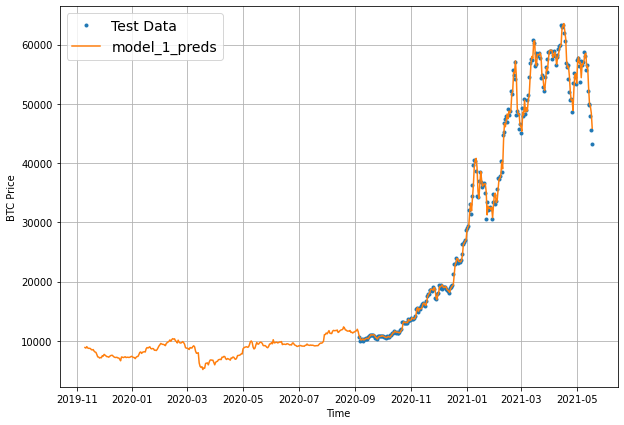

In [50]:
# Let's plot our model 1 prediction
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test window offset and index into test_labels to ensure corrent plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label='Test Data')

# Plot prediction
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds,format='-',  label='model_1_preds')


**Note** this is because of autocorrelation data

## Model 2 : Dense (window=30, horizon=1)

In [51]:
HORIZON = 1
WINDOW_SIZE = 30

In [52]:
# Make windowed data with appropritate horizon and window size
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [53]:
len(full_windows), len(full_labels)

(2757, 2757)

In [54]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                               labels=full_labels,
                                                                               test_split=0.2)

In [55]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [56]:
tf.random.set_seed(42)

# Create model 
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_2_dense')

# Compile
model_2.compile(loss='mae',
                optimizer='adam',
                metrics=['mae', 'mse'])

# Fit
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])


In [57]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 659.3332 - mae: 659.3332 - mse: 1397247.7500


[659.3331909179688, 659.3331909179688, 1397247.75]

In [58]:
# Load the best model (ALWAYS DO THIS!!)
model_2 = tf.keras.models.load_model('model_experiments/model_2_dense/')
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 605.8741 - mae: 605.8741 - mse: 1273360.7500


[605.8740844726562, 605.8740844726562, 1273360.75]

In [59]:
# Get forecast prediction
model_2_preds = make_preds(model_2, test_windows)
model_2_preds[:3], test_windows[:3]

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([8882.84 , 8904.423, 8762.442], dtype=float32)>,
 array([[8337.81899854, 8162.44      , 8003.82039479, 8058.05808111,
         7970.2394756 , 7943.34710706, 8200.3187634 , 8200.24609949,
         8073.40954388, 7420.41583649, 7460.61741593, 8591.22389742,
         9171.30653186, 9578.36755607, 9458.22335963, 9455.72469261,
         9225.99547934, 9131.41063031, 9197.63234462, 9290.89660239,
         9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
         8711.53433917, 8760.89271814],
        [8162.44      , 8003.82039479, 8058.05808111, 7970.2394756 ,
         7943.34710706, 8200.3187634 , 8200.24609949, 8073.40954388,
         7420.41583649, 7460.61741593, 8591.22389742, 9171.30653186,
         9578.36755607, 9458.22335963, 9455.72469261, 9225.99547934,
         9131.41063031, 9197.63234462, 9290.89660239, 9202.41545055,
         9369.62808116, 9326.59

In [60]:
model_1_preds[:3], test_windows[:3]

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([8861.71 , 8769.887, 9015.711], dtype=float32)>,
 array([[8337.81899854, 8162.44      , 8003.82039479, 8058.05808111,
         7970.2394756 , 7943.34710706, 8200.3187634 , 8200.24609949,
         8073.40954388, 7420.41583649, 7460.61741593, 8591.22389742,
         9171.30653186, 9578.36755607, 9458.22335963, 9455.72469261,
         9225.99547934, 9131.41063031, 9197.63234462, 9290.89660239,
         9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
         8711.53433917, 8760.89271814],
        [8162.44      , 8003.82039479, 8058.05808111, 7970.2394756 ,
         7943.34710706, 8200.3187634 , 8200.24609949, 8073.40954388,
         7420.41583649, 7460.61741593, 8591.22389742, 9171.30653186,
         9578.36755607, 9458.22335963, 9455.72469261, 9225.99547934,
         9131.41063031, 9197.63234462, 9290.89660239, 9202.41545055,
         9369.62808116, 9326.59

In [61]:
# Evaluate results
model_2_results = evaluate_preds(tf.squeeze(test_labels), model_2_preds)
model_2_results

{'MAE': 605.8741,
 'MSE': 1273360.8,
 'RMSE': 1128.4329,
 'MAPE': 2.726445,
 'MASE': 1.0590738}

In [62]:
model_1_results

{'MAE': 568.95105,
 'MSE': 1171743.8,
 'RMSE': 1082.4711,
 'MAPE': 2.5448983,
 'MASE': 0.9994894}

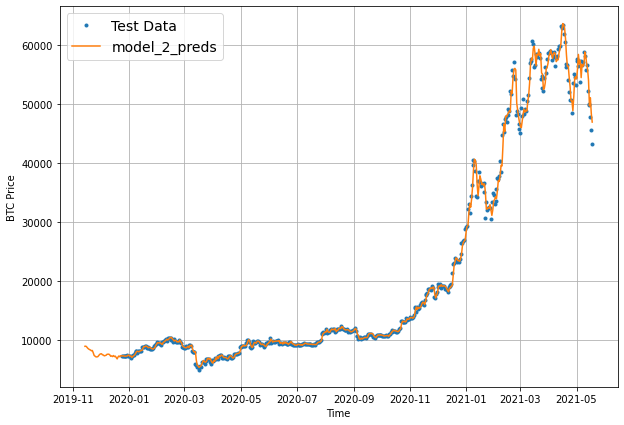

In [63]:
# Let's plot our model 1 prediction
offset = 40
plt.figure(figsize=(10, 7))
# Account for the test window offset and index into test_labels to ensure corrent plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label='Test Data')

# Plot prediction
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds,format='-',  label='model_2_preds')


# Model 3: Dense (window=30, horizon=7)

In [64]:
HORIZON = 7
WINDOW_SIZE = 30

In [65]:
# Make windowed data with appropritate horizon and window size
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [66]:
len(full_windows) , len(full_labels)

(2751, 2751)

In [67]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                               labels=full_labels,
                                                                               test_split=0.2)

In [68]:
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2200, 2200, 551, 551)

In [69]:
tf.random.set_seed(42)

# Create model 
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_3_dense')

# Compile
model_3.compile(loss='mae',
                optimizer='adam',
                metrics=['mae', 'mse'])

# Fit
model_3.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])


In [70]:
# Evaluate our model
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1300.1522 - mae: 1300.1522 - mse: 5599956.0000


[1300.1522216796875, 1300.1522216796875, 5599956.0]

In [71]:
# Load the best model (ALWAYS DO THIS!!)
model_3 = tf.keras.models.load_model('model_experiments/model_3_dense/')
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1237.5065 - mae: 1237.5065 - mse: 5405199.0000


[1237.5064697265625, 1237.5064697265625, 5405199.0]

In [72]:
model_3_preds = make_preds(model_3, test_windows)

In [73]:
model_3_preds[:3].numpy(), test_labels[:3]

(array([[9004.694 , 9048.1   , 9425.09  , 9258.256 , 9495.797 , 9558.453 ,
         9357.3545],
        [8735.506 , 8840.303 , 9247.793 , 8885.601 , 9097.186 , 9174.327 ,
         9156.818 ],
        [8672.508 , 8782.387 , 9123.857 , 8770.371 , 9007.13  , 9003.869 ,
         9042.725 ]], dtype=float32),
 array([[8794.35864452, 8798.04205463, 9081.18687849, 8711.53433917,
         8760.89271814, 8749.52059102, 8656.97092235],
        [8798.04205463, 9081.18687849, 8711.53433917, 8760.89271814,
         8749.52059102, 8656.97092235, 8500.64355816],
        [9081.18687849, 8711.53433917, 8760.89271814, 8749.52059102,
         8656.97092235, 8500.64355816, 8469.2608989 ]]))

In [74]:
# Evaluate results
model_3_results = evaluate_preds(tf.squeeze(test_labels), model_3_preds)
model_3_results

{'MAE': array([ 513.6056  ,  355.08328 ,  327.17075 ,  358.5106  ,  420.53305 ,
         537.854   ,  545.6617  ,  485.9228  ,  584.49713 ,  687.38214 ,
         836.2264  ,  755.1577  ,  731.4957  ,  775.3399  ,  567.95544 ,
         266.80865 ,  188.80217 ,  188.10799 ,  253.095   ,  301.43256 ,
         151.10721 ,  196.81473 ,  191.46178 ,  231.65031 ,  143.61125 ,
         122.59089 ,  132.78879 ,  190.8118  ,  179.15994 ,  228.26018 ,
         314.44022 ,  379.09244 ,  278.32526 ,  295.3471  ,  299.3852  ,
         248.64983 ,  299.75662 ,  259.69434 ,  180.30531 ,  206.72922 ,
         374.62863 ,  144.85086 ,  142.33635 ,  131.11613 ,   93.9412  ,
          54.825542,   73.79548 ,  103.60128 ,  121.333916,  168.67278 ,
         183.90945 ,  152.25307 ,  186.57199 ,  146.91267 ,  240.42912 ,
         351.00662 ,  540.952   ,  549.1573  ,  521.2411  ,  526.8554  ,
         453.36237 ,  257.98102 ,  277.29486 ,  301.8247  ,  455.718   ,
         458.96017 ,  503.4438  ,  522.3119 

## Make our evaluation function work for larger horizons

In [75]:
def evaluate_preds(y_true, y_pred):
  """
  Return evaluation metrics in dictionary form of (MAE, MSE, sMAPE, and MASE)
  
  Make sure float32 datatype (for metric calculation)
  """
  # Turning datatype to float32
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)


  # MAE
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)

  # MSE
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)

  # RMSE
  rmse = tf.sqrt(mse)

  # sMAPE (MAPE and sMAPE is different)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred) 

  # MASE
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {'MAE': mae.numpy(),
          'MSE': mse.numpy(),
          'RMSE': rmse.numpy(),
          'MAPE': mape.numpy(),
          'MASE': mase.numpy()} # convert to numpy so that it does not return as a tensor -> will create an error

In [76]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(tf.squeeze(test_labels), model_3_preds)
model_3_results

{'MAE': 1237.5063,
 'MSE': 5405198.5,
 'RMSE': 1425.7478,
 'MAPE': 5.5588784,
 'MASE': 2.2020733}

In [77]:
model_1_results, model_2_results, model_3_results

({'MAE': 568.95105,
  'MSE': 1171743.8,
  'RMSE': 1082.4711,
  'MAPE': 2.5448983,
  'MASE': 0.9994894},
 {'MAE': 605.8741,
  'MSE': 1273360.8,
  'RMSE': 1128.4329,
  'MAPE': 2.726445,
  'MASE': 1.0590738},
 {'MAE': 1237.5063,
  'MSE': 5405198.5,
  'RMSE': 1425.7478,
  'MAPE': 5.5588784,
  'MASE': 2.2020733})

# Model 3 visualize

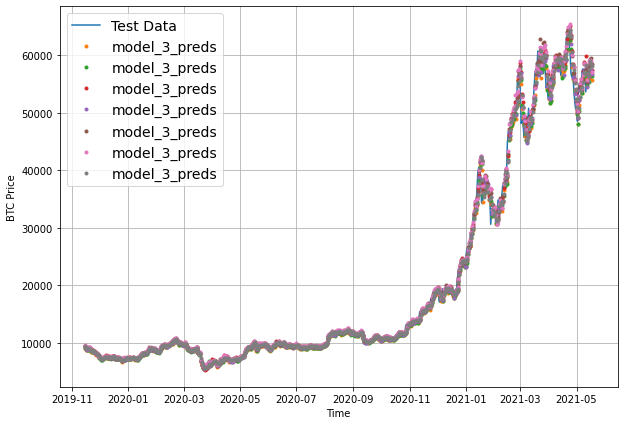

In [78]:
# Let's plot our model 1 prediction
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test window offset and index into test_labels to ensure corrent plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0],format='-', start=offset, label='Test Data')

# Plot prediction
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds,  label='model_3_preds')


**Note** We need to reduce dimensionality using `tf.reduce_mean` to get only one mean value from 7 horizons

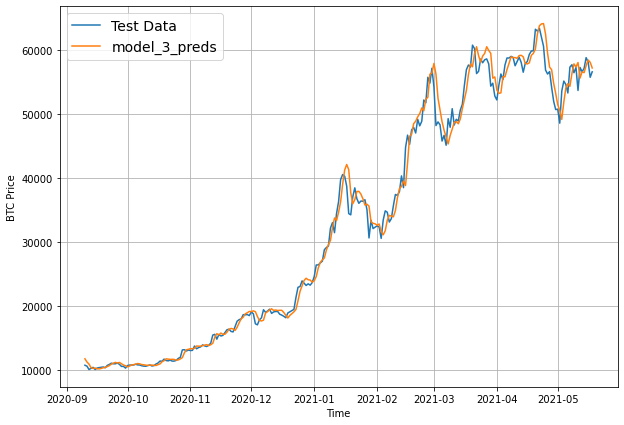

In [79]:
# Let's plot our model 1 prediction
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test window offset and index into test_labels to ensure corrent plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0],start=offset,format='-', label='Test Data')

# Plot prediction
plot_time_series(timesteps=X_test[-len(test_windows):],  values=tf.reduce_mean(model_3_preds, axis=1), start=offset, format='-',  label='model_3_preds')


# Which of our models is performing the best so far?

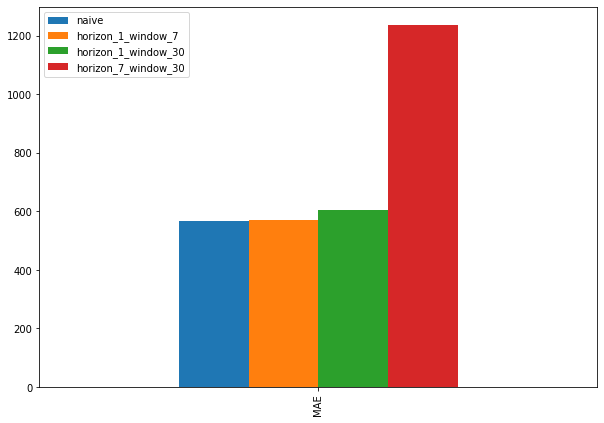

In [80]:
df_results = pd.DataFrame({'naive': naive_results['MAE'],
                           'horizon_1_window_7': model_1_results['MAE'],
                           'horizon_1_window_30': model_2_results['MAE'],
                           'horizon_7_window_30': model_3_results['MAE']}, index=['MAE']).plot(figsize=(10,7), kind='bar')

# Model 4 : Conv1D



In [81]:
HORIZON = 1 
WINDOW_SIZE = 7 

In [82]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [83]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                               labels=full_labels,
                                                                               test_split=0.2)

In [84]:
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

We need an input shape of : `(batch_size, timesteps, input_dim)`

However our data isn't in that shape yet...

In [85]:
# Check data input shape
train_windows[0].shape # returns (WINDOW_SIZE, ) 

(7,)

In [86]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [87]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dim`

In [88]:
#  Test out our lambda layer
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}")

Original shape: (7,)
Expanded shape: (7, 1)


In [89]:
train_windows[0]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])

In [90]:
expand_dims_layer(x)

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[123.65499],
       [125.455  ],
       [108.58483],
       [118.67466],
       [121.33866],
       [120.65533],
       [121.795  ]], dtype=float32)>

In [91]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
  layers.Lambda(lambda x : tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=128, kernel_size=7, strides=1, padding='causal', activation='relu'), # kernel size = window sliding 
  layers.Dense(1)
], name='model_4_conv1d')



In [92]:
# Compile the model
model_4.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_4.fit(train_windows, train_labels, batch_size=128, epochs=100, verbose=0, validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [93]:
# Summary
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            6400      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 6,529
Trainable params: 6,529
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Evaluate model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 615.6102


615.6101684570312

In [95]:
model_4 = tf.keras.models.load_model('/content/model_experiments/model_4_conv1d')

In [96]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.7388


570.73876953125

In [97]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8893.429, 8788.89 , 9020.29 , 8796.402, 8743.089], dtype=float32)>

In [98]:
# Evaluate predictions
model_4_results = evaluate_preds(tf.squeeze(test_labels),
                                 model_4_preds)
model_4_results

{'MAE': 570.7388,
 'MSE': 1183499.9,
 'RMSE': 1087.8878,
 'MAPE': 2.5461204,
 'MASE': 1.00263}

# Model 5 : LSTM

`inputs = layers.Input(shape=(WINDOW_SIZE))`
`x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)`
`x = layers.LSTM(128)(x)`
`output = layers.Dense(HORIZON)(x)`

`model_5 = tf.keras.Model(inputs=inputs, outputs=output, name='model_5_LSTM')`

In [99]:
tf.random.set_seed(42)

# Create LSTM model
model_5 = tf.keras.Sequential([
  layers.Lambda(lambda x : tf.expand_dims(x, axis=1)),
  # layers.LSTM(128, activation='tanh'),
  layers.LSTM(128, activation='relu'), # relu turns out better than the default 'tanh'
  layers.Dense(1)
], name='model_5_lstm')

# Using keras Functional API


# Compile the model
model_5.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                )
# Fit the model
model_5.fit(train_windows, train_labels, epochs=100, verbose=1, validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
65/70 [==========================>...] - ETA: 0s - loss: 976.2431 

70/70 [==============================] - 4s 30ms/step - loss: 923.8335 - val_loss: 999.7739
Epoch 2/100
70/70 [==============================] - 0s 5ms/step - loss: 174.3591 - val_loss: 1059.5967
Epoch 3/100
66/70 [===========================>..] - ETA: 0s - loss: 170.9062

70/70 [==============================] - 2s 27ms/step - loss: 169.0976 - val_loss: 915.7005
Epoch 4/100
70/70 [==============================] - 0s 6ms/step - loss: 164.8597 - val_loss: 961.9780
Epoch 5/100
67/70 [===========================>..] - ETA: 0s - loss: 164.4117

70/70 [==============================] - 2s 27ms/step - loss: 162.1378 - val_loss: 881.1057
Epoch 6/100
70/70 [==============================] - 0s 6ms/step - loss: 154.4248 - val_loss: 1048.9911
Epoch 7/100
66/70 [===========================>..] - ETA: 0s - loss: 154.5839

70/70 [==============================] - 2s 30ms/step - loss: 151.9672 - val_loss: 817.6928
Epoch 8/100
69/70 [============================>.] - ETA: 0s - loss: 149.2738

70/70 [==============================] - 2s 27ms/step - loss: 148.8312 - val_loss: 783.2538
Epoch 9/100
70/70 [==============================] - 0s 6ms/step - loss: 140.9373 - val_loss: 801.6102
Epoch 10/100
70/70 [==============================] - 0s 6ms/step - loss: 145.7707 - val_loss: 848.7509
Epoch 11/100
66/70 [===========================>..] - ETA: 0s - loss: 138.4711

70/70 [==============================] - 2s 27ms/step - loss: 138.0576 - val_loss: 777.6620
Epoch 12/100
65/70 [==========================>...] - ETA: 0s - loss: 135.9875

70/70 [==============================] - 2s 27ms/step - loss: 136.0284 - val_loss: 724.0181
Epoch 13/100
70/70 [==============================] - 0s 6ms/step - loss: 131.3890 - val_loss: 955.6802
Epoch 14/100
70/70 [==============================] - 0s 6ms/step - loss: 133.7509 - val_loss: 789.2650
Epoch 15/100
65/70 [==========================>...] - ETA: 0s - loss: 129.4204

70/70 [==============================] - 2s 31ms/step - loss: 128.5206 - val_loss: 684.2516
Epoch 16/100
66/70 [===========================>..] - ETA: 0s - loss: 127.4684

70/70 [==============================] - 2s 27ms/step - loss: 126.0890 - val_loss: 670.2017
Epoch 17/100
70/70 [==============================] - 0s 6ms/step - loss: 123.1890 - val_loss: 734.0786
Epoch 18/100
64/70 [==========================>...] - ETA: 0s - loss: 134.8465

70/70 [==============================] - 2s 27ms/step - loss: 130.8150 - val_loss: 654.8058
Epoch 19/100
70/70 [==============================] - 0s 5ms/step - loss: 124.7924 - val_loss: 701.4959
Epoch 20/100
70/70 [==============================] - 0s 5ms/step - loss: 119.9926 - val_loss: 657.3356
Epoch 21/100
70/70 [==============================] - 0s 5ms/step - loss: 120.1237 - val_loss: 677.9814
Epoch 22/100
66/70 [===========================>..] - ETA: 0s - loss: 120.3128

70/70 [==============================] - 2s 31ms/step - loss: 119.3270 - val_loss: 644.2029
Epoch 23/100
70/70 [==============================] - 0s 6ms/step - loss: 122.7527 - val_loss: 730.0645
Epoch 24/100
62/70 [=========================>....] - ETA: 0s - loss: 120.6807

70/70 [==============================] - 2s 31ms/step - loss: 118.7916 - val_loss: 630.5251
Epoch 25/100
67/70 [===========================>..] - ETA: 0s - loss: 120.3109

70/70 [==============================] - 3s 38ms/step - loss: 119.3102 - val_loss: 622.8295
Epoch 26/100
70/70 [==============================] - 0s 6ms/step - loss: 124.2459 - val_loss: 632.5388
Epoch 27/100
70/70 [==============================] - 0s 6ms/step - loss: 121.0156 - val_loss: 688.8699
Epoch 28/100
69/70 [============================>.] - ETA: 0s - loss: 115.0017

70/70 [==============================] - 2s 28ms/step - loss: 115.0217 - val_loss: 611.2283
Epoch 29/100
70/70 [==============================] - 0s 5ms/step - loss: 119.5380 - val_loss: 624.9897
Epoch 30/100
70/70 [==============================] - 0s 6ms/step - loss: 115.5532 - val_loss: 615.2344
Epoch 31/100
70/70 [==============================] - 0s 6ms/step - loss: 116.2119 - val_loss: 677.5491
Epoch 32/100
70/70 [==============================] - 0s 6ms/step - loss: 114.9912 - val_loss: 615.0742
Epoch 33/100
70/70 [==============================] - 0s 6ms/step - loss: 115.1890 - val_loss: 660.7283
Epoch 34/100
70/70 [==============================] - 0s 6ms/step - loss: 121.4952 - val_loss: 617.4849
Epoch 35/100
61/70 [=========================>....] - ETA: 0s - loss: 116.3789

70/70 [==============================] - 2s 32ms/step - loss: 114.3644 - val_loss: 601.5720
Epoch 36/100
70/70 [==============================] - 0s 6ms/step - loss: 115.0390 - val_loss: 638.0224
Epoch 37/100
70/70 [==============================] - 0s 6ms/step - loss: 115.5464 - val_loss: 630.5712
Epoch 38/100
70/70 [==============================] - 0s 6ms/step - loss: 127.9032 - val_loss: 729.8533
Epoch 39/100
70/70 [==============================] - 0s 6ms/step - loss: 119.1471 - val_loss: 768.5645
Epoch 40/100
62/70 [=========================>....] - ETA: 0s - loss: 122.4576

70/70 [==============================] - 2s 28ms/step - loss: 120.7206 - val_loss: 593.0177
Epoch 41/100
70/70 [==============================] - 0s 6ms/step - loss: 111.7753 - val_loss: 658.1022
Epoch 42/100
70/70 [==============================] - 0s 6ms/step - loss: 112.6756 - val_loss: 603.8380
Epoch 43/100
70/70 [==============================] - 0s 6ms/step - loss: 113.0656 - val_loss: 609.7631
Epoch 44/100
70/70 [==============================] - 0s 6ms/step - loss: 115.2705 - val_loss: 702.2490
Epoch 45/100
62/70 [=========================>....] - ETA: 0s - loss: 111.7462

70/70 [==============================] - 2s 27ms/step - loss: 112.9802 - val_loss: 587.7270
Epoch 46/100
70/70 [==============================] - 0s 6ms/step - loss: 123.1217 - val_loss: 670.1492
Epoch 47/100
70/70 [==============================] - 0s 6ms/step - loss: 114.0793 - val_loss: 736.3560
Epoch 48/100
64/70 [==========================>...] - ETA: 0s - loss: 115.1196

70/70 [==============================] - 2s 27ms/step - loss: 116.1055 - val_loss: 584.6566
Epoch 49/100
70/70 [==============================] - ETA: 0s - loss: 111.6030

70/70 [==============================] - 2s 33ms/step - loss: 111.6030 - val_loss: 584.3054
Epoch 50/100
70/70 [==============================] - 0s 6ms/step - loss: 113.0661 - val_loss: 597.9438
Epoch 51/100
70/70 [==============================] - 0s 5ms/step - loss: 115.9821 - val_loss: 608.9402
Epoch 52/100
70/70 [==============================] - 0s 6ms/step - loss: 118.3501 - val_loss: 601.7717
Epoch 53/100
70/70 [==============================] - 0s 6ms/step - loss: 110.5680 - val_loss: 591.6512
Epoch 54/100
70/70 [==============================] - 0s 6ms/step - loss: 112.0331 - val_loss: 598.9587
Epoch 55/100
66/70 [===========================>..] - ETA: 0s - loss: 111.9219

70/70 [==============================] - 2s 27ms/step - loss: 110.0361 - val_loss: 578.8579
Epoch 56/100
70/70 [==============================] - 0s 6ms/step - loss: 113.3981 - val_loss: 651.3969
Epoch 57/100
70/70 [==============================] - 0s 6ms/step - loss: 113.3235 - val_loss: 579.8799
Epoch 58/100
70/70 [==============================] - 0s 6ms/step - loss: 110.9348 - val_loss: 594.9945
Epoch 59/100
70/70 [==============================] - 0s 6ms/step - loss: 111.0759 - val_loss: 598.4797
Epoch 60/100
70/70 [==============================] - 0s 6ms/step - loss: 110.0784 - val_loss: 624.2524
Epoch 61/100
70/70 [==============================] - 0s 6ms/step - loss: 113.0026 - val_loss: 633.1222
Epoch 62/100
70/70 [==============================] - 0s 6ms/step - loss: 109.7577 - val_loss: 580.9935
Epoch 63/100
63/70 [==========================>...] - ETA: 0s - loss: 109.2811

70/70 [==============================] - 2s 27ms/step - loss: 108.9819 - val_loss: 577.5323
Epoch 64/100
70/70 [==============================] - 0s 6ms/step - loss: 113.2528 - val_loss: 626.8867
Epoch 65/100
70/70 [==============================] - 0s 6ms/step - loss: 111.6353 - val_loss: 578.3531
Epoch 66/100
70/70 [==============================] - 0s 6ms/step - loss: 109.5341 - val_loss: 612.4676
Epoch 67/100
63/70 [==========================>...] - ETA: 0s - loss: 106.7605

70/70 [==============================] - 2s 27ms/step - loss: 109.4162 - val_loss: 573.5859
Epoch 68/100
70/70 [==============================] - 0s 6ms/step - loss: 108.1778 - val_loss: 574.8300
Epoch 69/100
70/70 [==============================] - 0s 6ms/step - loss: 115.6086 - val_loss: 685.5164
Epoch 70/100
70/70 [==============================] - 0s 6ms/step - loss: 110.8787 - val_loss: 575.0029
Epoch 71/100
70/70 [==============================] - 0s 6ms/step - loss: 113.6486 - val_loss: 708.1323
Epoch 72/100
70/70 [==============================] - 0s 5ms/step - loss: 111.9779 - val_loss: 637.9200
Epoch 73/100
70/70 [==============================] - 0s 6ms/step - loss: 108.1487 - val_loss: 573.9632
Epoch 74/100
67/70 [===========================>..] - ETA: 0s - loss: 111.2173

70/70 [==============================] - 2s 31ms/step - loss: 111.4731 - val_loss: 573.0729
Epoch 75/100
70/70 [==============================] - 0s 5ms/step - loss: 109.8500 - val_loss: 693.3377
Epoch 76/100
70/70 [==============================] - 0s 6ms/step - loss: 113.6983 - val_loss: 578.7035
Epoch 77/100
70/70 [==============================] - 0s 6ms/step - loss: 110.2631 - val_loss: 584.1373
Epoch 78/100
70/70 [==============================] - 0s 6ms/step - loss: 110.2029 - val_loss: 573.2184
Epoch 79/100
70/70 [==============================] - 0s 6ms/step - loss: 112.6008 - val_loss: 605.0843
Epoch 80/100
65/70 [==========================>...] - ETA: 0s - loss: 116.0855

70/70 [==============================] - 2s 27ms/step - loss: 114.8586 - val_loss: 572.6841
Epoch 81/100
70/70 [==============================] - 0s 6ms/step - loss: 108.8074 - val_loss: 640.2375
Epoch 82/100
70/70 [==============================] - 0s 6ms/step - loss: 116.8869 - val_loss: 730.2276
Epoch 83/100
70/70 [==============================] - 0s 6ms/step - loss: 110.3225 - val_loss: 573.4832
Epoch 84/100
63/70 [==========================>...] - ETA: 0s - loss: 106.8028

70/70 [==============================] - 2s 27ms/step - loss: 108.9233 - val_loss: 569.6898
Epoch 85/100
70/70 [==============================] - 0s 6ms/step - loss: 107.2475 - val_loss: 572.3955
Epoch 86/100
70/70 [==============================] - 0s 6ms/step - loss: 113.9578 - val_loss: 592.4625
Epoch 87/100
70/70 [==============================] - 0s 6ms/step - loss: 109.9852 - val_loss: 587.0535
Epoch 88/100
70/70 [==============================] - 0s 6ms/step - loss: 112.5881 - val_loss: 580.7653
Epoch 89/100
70/70 [==============================] - 0s 6ms/step - loss: 110.0377 - val_loss: 684.1923
Epoch 90/100
70/70 [==============================] - 0s 6ms/step - loss: 111.3718 - val_loss: 620.7026
Epoch 91/100
70/70 [==============================] - 0s 7ms/step - loss: 111.0432 - val_loss: 626.7546
Epoch 92/100
64/70 [==========================>...] - ETA: 0s - loss: 109.5563

70/70 [==============================] - 2s 28ms/step - loss: 109.8147 - val_loss: 568.9504
Epoch 93/100
70/70 [==============================] - 0s 6ms/step - loss: 107.7831 - val_loss: 590.6001
Epoch 94/100
70/70 [==============================] - 0s 6ms/step - loss: 112.7715 - val_loss: 621.3387
Epoch 95/100
70/70 [==============================] - 0s 6ms/step - loss: 110.3261 - val_loss: 602.2106
Epoch 96/100
70/70 [==============================] - 0s 6ms/step - loss: 114.0459 - val_loss: 642.1033
Epoch 97/100
70/70 [==============================] - 0s 6ms/step - loss: 114.3700 - val_loss: 578.8003
Epoch 98/100
70/70 [==============================] - 0s 6ms/step - loss: 110.4438 - val_loss: 578.9271
Epoch 99/100
70/70 [==============================] - 0s 6ms/step - loss: 111.1804 - val_loss: 580.5478
Epoch 100/100
70/70 [==============================] - 0s 6ms/step - loss: 109.8929 - val_loss: 570.3290


In [100]:
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.3290


570.3290405273438

In [101]:
# Load in the best version of model 5 from callback
model_5 = tf.keras.models.load_model('model_experiments/model_5_lstm')
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.9504


568.9503784179688

In [102]:
# Make predictions
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([8886.3955, 8785.118 , 9050.363 , 8812.146 , 8733.188 ],
      dtype=float32)>

In [103]:
# Evaluate model 5 predictions
model_5_results = evaluate_preds(tf.squeeze(test_labels), model_5_preds)

In [104]:
model_5_results

{'MAE': 568.9504,
 'MSE': 1174135.5,
 'RMSE': 1083.5753,
 'MAPE': 2.5381343,
 'MASE': 0.99948823}

**Note** Because neural networks are such powerful algorithms, they can be used for almost any problem, however, tthat doesn't mean they'll achieve performant or usable results.

# Make Multivariate Time Series Dataset

Before we add a feature to our ttime series, what is a feature we can use?

One feature we could add is whether or not __ tweeted on that day.

* day 1 - 0 (not tweeted)
* day 2 - 1 (tweeted)
* day 3 - 0 

What's a better feature to use?

How about Bitcoin Halving events?

Since we're working with open system, literally anything can influence the prices.



In [105]:
# Let's make a multivariate bitcoin
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [106]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 january 2009 - this block reward isn't in our dataset
block_reward_2 = 25 # 8 november 2012
block_reward_3 = 12.5 # 9 july 2016
block_reward_4 = 6.26 # 18 may 2020

# block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64('2020-05-18')


We need to add this values to the dataframe reflecting to our current data

In [107]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days # we get the days attribute from block_Rward3 - bitcoin_prices.index
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

block_reward_2_days , block_reward_3_days

(1012, 2421)

In [108]:
# Add block reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None

# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4 # -1 means , edit only the first column a.k.a block_reward

bitcoin_prices_block.tail()


,Price,block_reward
Date,,
2021-05-14,49764.132082,6.26
2021-05-15,50032.693137,6.26
2021-05-16,47885.625255,6.26
2021-05-17,45604.615754,6.26
2021-05-18,43144.471291,6.26


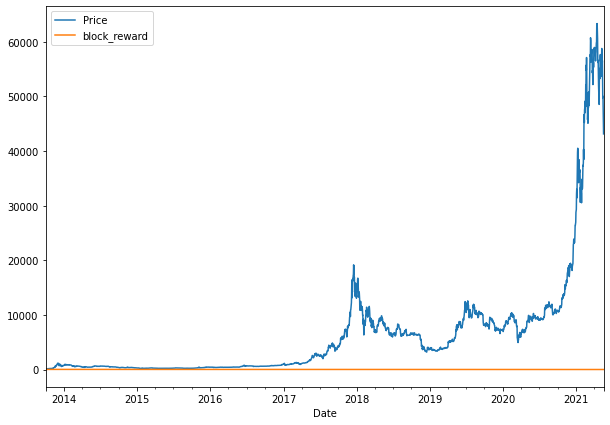

In [109]:
bitcoin_prices_block.plot(figsize=(10, 7
                                   ))

We can see that it is not in the same scale, so we have to make it on the same scale

In [110]:
from sklearn.preprocessing import minmax_scale

scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price', 'block_reward']]),
                                                  columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.head()

,Price,block_reward
Date,,
2013-10-01,0.000238,1.0
2013-10-02,0.000267,1.0
2013-10-03,0.000000,1.0
2013-10-04,0.000160,1.0
2013-10-05,0.000202,1.0


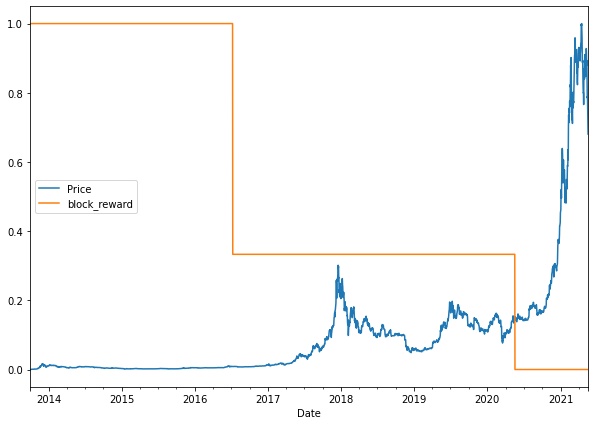

In [111]:
scaled_price_block_df.plot(figsize=(10, 7))

**Univariate** : Only one variable (using the price of Bitcoin) to predict the price of Bitcoin)

**Multivariate** : More than one variable (using the price of Bitcoin as well as the block_reward size to predic the price of bitcoin)

## Making a windowed dataset with pandas (Multivariate)

Previously, we've  turned our univariate time series into windoned dataset using the helper functions above.

However, since we've got multivariate data, these functions won't work.

Not to worry, we can used `pandas.DataFram.shift`
Desc: Shift index by desired number of periods with an optional time freq.

In [112]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [113]:
# Steps to use Pandas Shift

# Make a copy of the Bitcoin historical data with block reward feature

bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed['Price'].shift(periods=i+1)
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


What we've done is created a way to window our dataset directly from a pandas dataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_reward] => [7]
```

In [114]:
# Create X (windows) and y (horizons) features

X = bitcoin_prices_windowed.dropna().drop('Price', axis=1).astype(np.float32)  # axis 1 = columns, means only column Price.
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)

In [115]:
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2780 entries, 2013-10-08 to 2021-05-18
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   block_reward  2780 non-null   float32
 1   Price+1       2780 non-null   float32
 2   Price+2       2780 non-null   float32
 3   Price+3       2780 non-null   float32
 4   Price+4       2780 non-null   float32
 5   Price+5       2780 non-null   float32
 6   Price+6       2780 non-null   float32
 7   Price+7       2780 non-null   float32
dtypes: float32(8)
memory usage: 108.6 KB


In [116]:
X_train, X_test, y_train, y_test = make_train_test_splits(X, y)

In [117]:
len(X_train), len(X_train) , len(X_test) , len(y_test)

(2224, 2224, 556, 556)

In [118]:
X_train.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [119]:
X_test

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2019-11-10,12.50,8794.358398,9226.485352,9335.751953,9326.599609,9369.627930,9202.415039,9290.896484
2019-11-11,12.50,8798.041992,8794.358398,9226.485352,9335.751953,9326.599609,9369.627930,9202.415039
2019-11-12,12.50,9081.186523,8798.041992,8794.358398,9226.485352,9335.751953,9326.599609,9369.627930
2019-11-13,12.50,8711.534180,9081.186523,8798.041992,8794.358398,9226.485352,9335.751953,9326.599609
2019-11-14,12.50,8760.892578,8711.534180,9081.186523,8798.041992,8794.358398,9226.485352,9335.751953
...,...,...,...,...,...,...,...,...
2021-05-14,6.26,52147.820312,56573.554688,55715.546875,58102.191406,58788.210938,57107.121094,56583.851562
2021-05-15,6.26,49764.132812,52147.820312,56573.554688,55715.546875,58102.191406,58788.210938,57107.121094
2021-05-16,6.26,50032.691406,49764.132812,52147.820312,56573.554688,55715.546875,58102.191406,58788.210938


# Model 6: Dense (multivariate time series)

In [120]:
tf.random.set_seed(42)

# Make multivariate time series model

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(132, activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name='model_6_multivariate')


# Compile the model
model_6.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

# Fit the model
model_6.fit(X_train, y_train, epochs=100, 
            batch_size=128,
            verbose=1,
            validation_data=(X_test ,y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)]
           )

Epoch 1/100
18/18 [==============================] - 1s 32ms/step - loss: 993.6309 - mae: 993.6309 - mse: 3701264.0000 - val_loss: 2490.9009 - val_mae: 2490.9011 - val_mse: 14028953.0000
Epoch 2/100
18/18 [==============================] - 0s 26ms/step - loss: 242.4795 - mae: 242.4795 - mse: 264130.0625 - val_loss: 965.2625 - val_mae: 965.2625 - val_mse: 3035745.5000
Epoch 3/100
18/18 [==============================] - 0s 25ms/step - loss: 165.6047 - mae: 165.6047 - mse: 136671.6250 - val_loss: 854.2951 - val_mae: 854.2951 - val_mse: 2471277.5000
Epoch 4/100
18/18 [==============================] - 0s 26ms/step - loss: 156.8527 - mae: 156.8527 - mse: 132679.6250 - val_loss: 840.9022 - val_mae: 840.9022 - val_mse: 2392994.0000
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 153.3608 - mae: 153.3608 - mse: 128382.4453 - val_loss: 849.7175 - val_mae: 849.7175 - val_mse: 2323649.2500
Epoch 6/100
18/18 [==============================] - 0s 27ms/step - loss: 149.6115

In [121]:
# Evaluate model
model_6.evaluate(X_test ,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 706.6658 - mae: 706.6658 - mse: 1474606.8750


[706.665771484375, 706.665771484375, 1474606.875]

In [122]:
# Load in and evaluate our best performing model
model_6 = tf.keras.models.load_model('model_experiments/model_6_multivariate')
model_6.evaluate(X_test ,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 563.1437 - mae: 563.1437 - mse: 1152498.6250


[563.1437377929688, 563.1437377929688, 1152498.625]

In [123]:
# Make prediction 
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8850.83 , 8796.597, 9042.869, 8767.816, 8752.08 ], dtype=float32)>

In [124]:
# Evaluate prediction to get eval metrics
model_6_results = evaluate_preds(y_test, model_6_preds)

In [125]:
model_6_results

{'MAE': 563.1437,
 'MSE': 1152498.6,
 'RMSE': 1073.5449,
 'MAPE': 2.517544,
 'MASE': 0.98928744}

In [126]:
model_1_results

{'MAE': 568.95105,
 'MSE': 1171743.8,
 'RMSE': 1082.4711,
 'MAPE': 2.5448983,
 'MASE': 0.9994894}

# Model 7 : N-Beats algorithm

**Source** : https://arxiv.org/abs/1905.10437

**Goals**:
* Practice replicating a paper with TensorFlow
* Use TensorFlow layer subclassing
* Get experience to learn Functional API
* Potentially get state of the art result on our problem

## Building and testing the N-BEATS block layer

Because N-BEATS block layer doesn't exist in TensorFlow, we've got to create it.

To create custom layers and models in TensorFlow we can use subclassing: https://www.tensorflow.org/guide/keras/custom_layers_and_models

In [127]:
# Create NBeatBlock custom layer 
# Custom layer is a network that doesn't already exists in TensorFlow

class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, 
               input_size: int, 
               theta_size: int, 
               horizon: int, 
               n_neurons: int, 
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons 
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]
    
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation='linear', name='theta')
  
  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs to each of hidden layer
      x = layer(x)
    theta = self.theta_layer(x)

    # Output the backast and the forecast from theta
    backast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backast, forecast  
    

## Test N-BEATS class for Dummy Inputs

In [128]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backast + forecast
                                       horizon=HORIZON, 
                                       n_neurons= 128,
                                       n_layers = 4
                                       )

In [129]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [130]:
# Pass dummy inputs to dummy NBeatsBlock layer
backast, forecast = dummy_nbeats_block_layer(dummy_inputs)

# These are the activation outputs of the theta layer 
print(f"Backast: {tf.squeeze(backast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}" )

Backast: [ 0.19014993  0.83798355 -0.3287001   0.2515993  -0.47540283 -0.7783665
 -0.5299447 ]
Forecast: -0.7554212808609009


## Preparing data pipeline for the N-BEATS algorithm using `tf.data`

Make input data load as fast as possible 

In [131]:
HORIZON = 1
WINDOW_SIZE = 7

# Create NBEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [132]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price + {i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [133]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()['Price']

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]


In [134]:
 # Time to make our dataset performant using tf.data API
 train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
 train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

 test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
 test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

In [135]:
# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# BATCH SIZE based on paper

BATCH_SIZE = 1024

# PREFETCH
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

## Setting up hyperparameters for N-BEATS algorithm

In [136]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON

THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

## Residual Connections

We need 2 layers ( substract and Add).
both from tensorflow.

Because N-BEATS algorithm uses double residual stacking to help train its deeper architecture.

In [137]:
# Make dummy
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

In [138]:
tensor_1, tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

In [139]:
subtracted.numpy()

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)

In [140]:
added.numpy()

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)

## Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this will be the initial block used 
2. Create an input layer for the N-BEATS (we'll be using Keras Functional API)
3. Make the initla backast and forecasts for the model with the layer created in (1)
4. Use for loop to create a stakcs of block layers
5. Use the `NBeatsBlock` class within the for loop in (4) to create blocks which return backasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using `tf.keras.Model()`
8. Compile the model with MAE loss and Adam optimizers
9. Fit the model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbakcs:
  * Early Stopping Callback
  * Reduce LR on Plateau - if a model stops improving, try lowering the learning to reduce the amount it updates its weights each time.

In [141]:
# 
tf.random.set_seed(42)

#1. Setup an instance of the N-BEATS block layer using NBeatsBlock (this will be the initial block used
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                       theta_size=THETA_SIZE, # backast + forecast
                                       horizon=HORIZON, 
                                       n_neurons= N_NEURONS,
                                       n_layers = N_LAYERS,
                                 name='InitialBlock'
                                       )

#2.Create an input layer for the N-BEATS (we'll be using Keras Functional API)
stack_input = layers.Input(shape=(INPUT_SIZE), name='stack_input')

#3. Make the initla backast and forecasts (BACKWARDS PREDICTION + HORIZON PREDICTION)
residuals, forecast = nbeats_block_layer(stack_input)

#4. Create stakcs of block layers
for i, _ in enumerate(range(N_STACKS-1)): # -1 because we already created in step (3)
    # 5. Use the NBeatsBlock to calculate the backast as well as the forecast
    backast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,
                                       theta_size=THETA_SIZE, # backast + forecast
                                       horizon=HORIZON, 
                                       n_neurons= N_NEURONS,
                                       n_layers = N_LAYERS,
                                       name=f'NBeatsBlock_{i}'
                                       )(residuals)
    # 6. Create the double residual stacking
    residuals = layers.subtract([residuals, backast], name=f'subtract_{i}')   
    forecast = layers.add([forecast, block_forecast], name=f'add_{i}')

#7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name='model_7_NBEATS')

#8. Compile the model
model_7.compile(loss='mae', optimizer=tf.keras.optimizers.Adam())

#9. Fit the model with Earlystopping and reduce LR on plateau callbacks
model_7.fit(train_dataset, epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                            patience=100,
                                                            factor=0.1, # reduce lr by this factor
                                                            verbose=1)])


Epoch 767: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1180: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1280: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.


In [142]:
# Evaluate N-Beats model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 22ms/step - loss: 575.3721


575.3720703125

In [143]:
# Make predictions with N-BEATS mdoel
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8828.933, 8772.072, 9037.291, 8730.033, 8769.146], dtype=float32)>

In [144]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'MAE': 575.3721,
 'MSE': 1155772.1,
 'RMSE': 1075.0685,
 'MAPE': 2.6038158,
 'MASE': 1.0107694}

In [145]:
model_1_results

{'MAE': 568.95105,
 'MSE': 1171743.8,
 'RMSE': 1082.4711,
 'MAPE': 2.5448983,
 'MASE': 0.9994894}

In [146]:
naive_results

{'MAE': 567.9802,
 'MSE': 1147547.0,
 'RMSE': 1071.2362,
 'MAPE': 2.516525,
 'MASE': 0.99957}

## Plotting the N-BEATS architecture we've created
Turn out the N-BEATS replicated model does not show us better result than the simple model

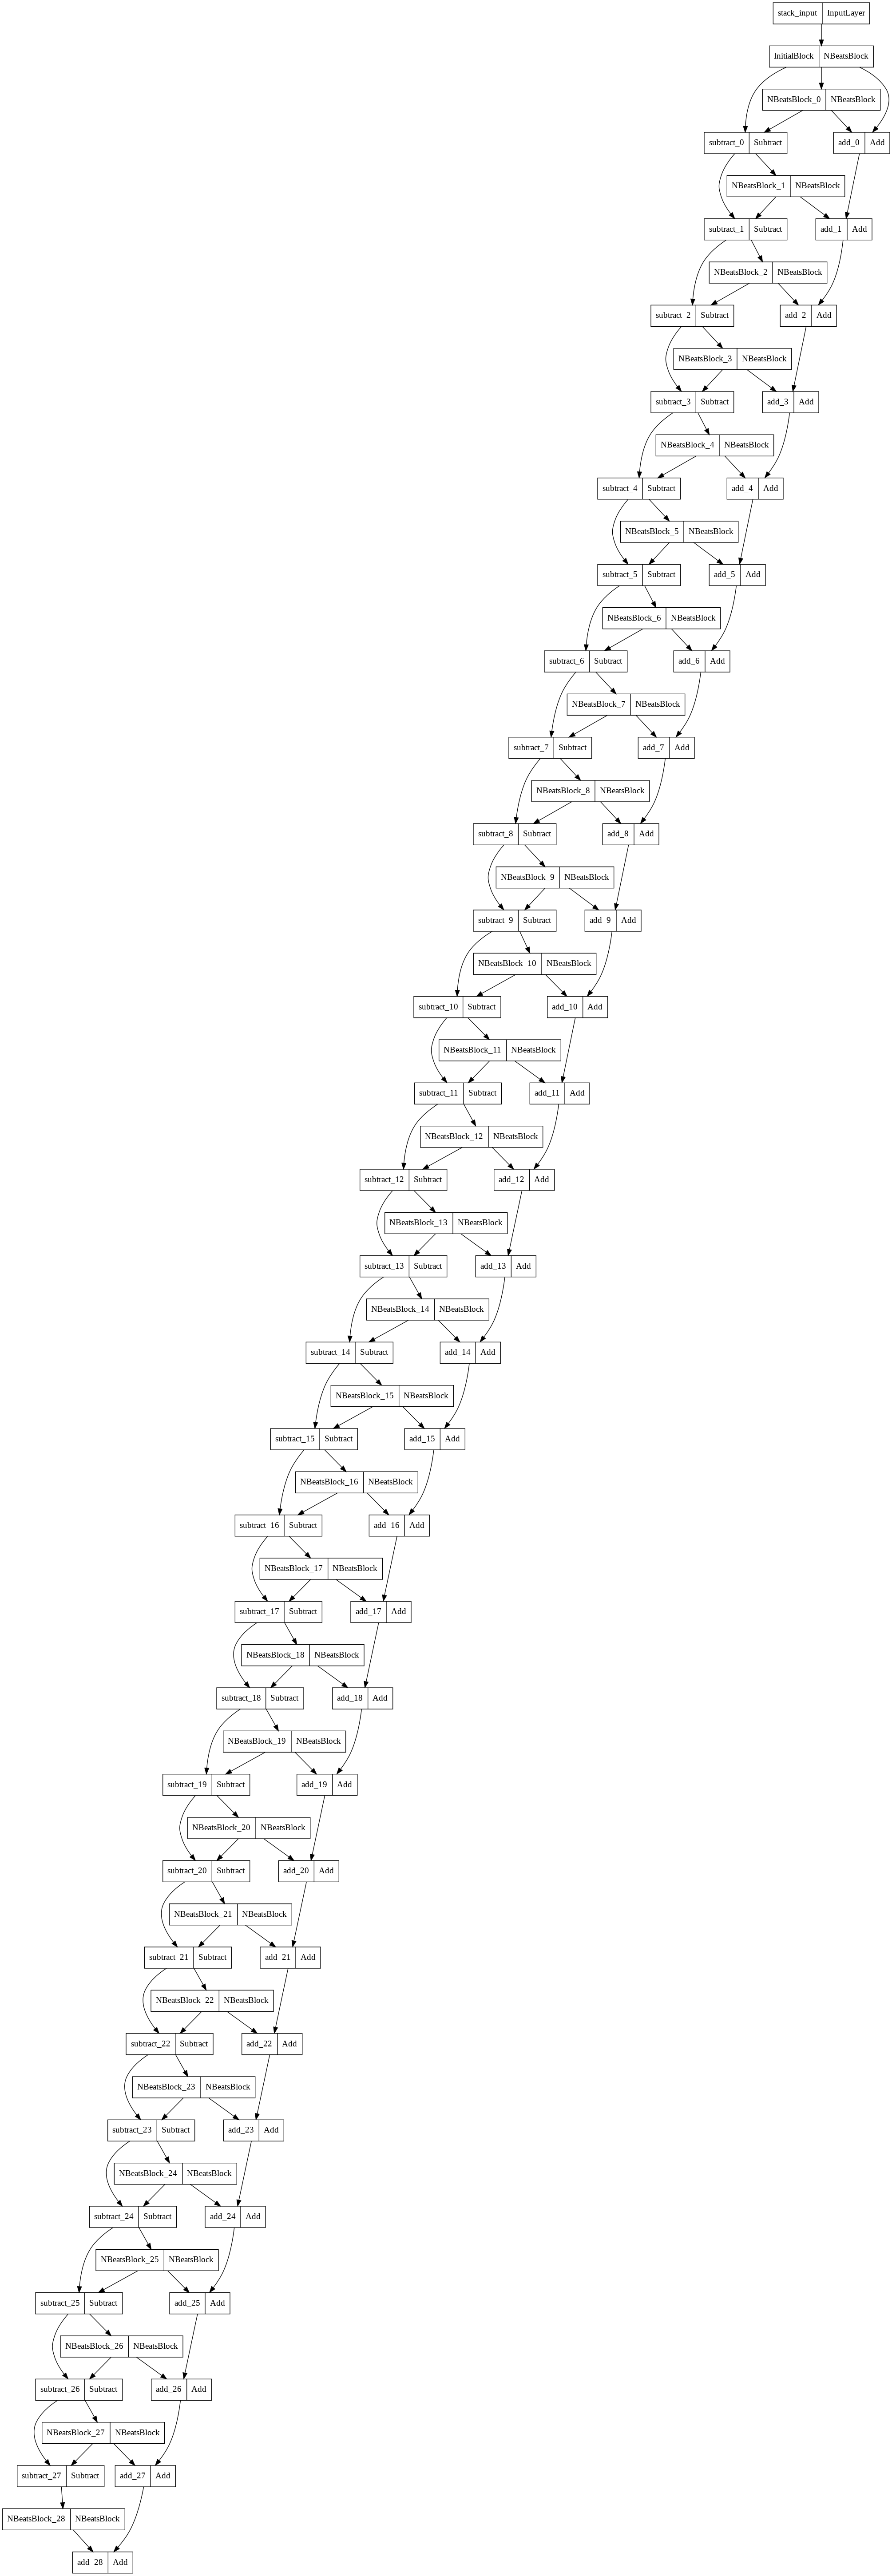

In [147]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

# Model 8: Ensemble Model

## Constructing and fitting an ensemble of models (using different loss)

**Note** 

Kernel_initializer is a way of the layers to set up an initial patterns to learned from for the layers 

In [148]:
def get_ensemble_models(horizon=HORIZON,
                        train_data = train_dataset,
                        test_data = test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=['mae', 'mse', 'mape']
                        ):
  """
  Return a list of num_iter model each trained on MAE, MSE and MAPE loss.


  """

  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
          # Initialize dense layers with normal distribution for estimating prediction intervals
          layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
          layers.Dense(128, kernel_initializer='he_normal'),
          layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function, optimizer=tf.keras.optimizers.Adam(),metrics=['mae','mse'])

      # Fit the current model
      model.fit(train_data, epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)
  return ensemble_models

In [149]:
%%time
# Get list of trained and fitted ensemble models
ensemble_models = get_ensemble_models(num_iter=5, num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 482: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 119: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 839: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 939: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 584: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 684: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 1

Epoch 116: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 657: ReduceLROnPlateau reduci

### Make predictions with Ensemble Model

In [150]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, test_data):
  ensemble_preds = []
  for model in ensemble_models:
    y_preds = model.predict(test_data)
    ensemble_preds.append(y_preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [151]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models, test_dataset)

CPU times: user 844 ms, sys: 32.6 ms, total: 876 ms
Wall time: 1.02 s


In [152]:
ensemble_preds.shape

TensorShape([15, 556])

In [153]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8905.837,  8878.394,  9067.012, ..., 50312.32 , 49572.805,
        46392.5  ],
       [ 8726.781,  8733.323,  9015.878, ..., 49868.367, 48246.52 ,
        45705.348],
       [ 8720.429,  8722.378,  9033.353, ..., 49883.56 , 47423.117,
        45326.016],
       ...,
       [ 8758.367,  8664.174,  8896.801, ..., 49164.84 , 48465.426,
        45535.77 ],
       [ 8750.042,  8748.333,  9010.727, ..., 49639.812, 48049.406,
        46384.617],
       [ 8820.414,  8807.509,  9040.433, ..., 50485.133, 48049.773,
        46293.246]], dtype=float32)>

### Combining Ensemble Predictions 

* Mean Predicted Value
* Median Predicted value

In [154]:
# Ensemble mean
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8725.212 ,  8693.006 ,  8956.849 ,  8641.988 ,  8661.902 ,
        8650.098 ,  8580.187 ,  8402.204 ,  8383.858 ,  8433.929 ,
        8131.2344,  8031.9404,  7978.613 ,  7573.321 ,  7225.8657,
        7242.851 ,  7014.267 ,  7138.126 ,  7046.864 ,  7446.966 ,
        7320.383 ,  7662.6655,  7493.9116,  7344.0317,  7243.3394,
        7247.5312,  7129.8623,  7310.816 ,  7429.686 ,  7466.0015,
        7478.9683,  7276.053 ,  7168.6616,  7109.706 ,  7111.266 ,
        7154.055 ,  7021.192 ,  7035.721 ,  6812.571 ,  6540.1646,
        7307.2876,  7112.081 ,  7110.4893,  7191.325 ,  7223.5786,
        7104.6177,  7155.7505,  7140.011 ,  7110.8647,  7146.015 ,
        7233.9146,  7309.8794,  7185.524 ,  7109.1377,  7092.1094,
        6886.9834,  7191.4106,  7257.4146,  7290.4272,  7622.445 ,
        7986.739 ,  8061.7417,  7788.4263,  8007.581 ,  8004.5874,
        8082.423 ,  8030.423 ,  8640.704 ,  8791.314 ,  8695.181 ,
        8849.9

In [155]:
# Ensemble median
ensemble_median = np.median(ensemble_preds, axis=0)

In [156]:
# Evaluate ensemble models predictions
ensemble_results = evaluate_preds(y_test, ensemble_median)

ensemble_results

{'MAE': 565.3595,
 'MSE': 1138784.4,
 'RMSE': 1067.1384,
 'MAPE': 2.561557,
 'MASE': 0.99318004}

In [157]:
model_1_results

{'MAE': 568.95105,
 'MSE': 1171743.8,
 'RMSE': 1082.4711,
 'MAPE': 2.5448983,
 'MASE': 0.9994894}

### Plotting the prediction intervals (uncertainty estimates) of ensemble

**Goals**: Know a range of where that prediction came from?

E.g instead of 50.000 USD on the dot, how about 48,000 to 52,000 USD?

a.k.a Lower bound and upper bound prediction from y_preds

One way to get the 95% confidene prediction intervals for a deep learning model is the bootstrap method:
1. Take the predictions from a number of randomly initialized models 
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal), 90% of observations fall within 1.96 standard deviations of the mean
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions

**Source**
* https://en.wikipedia.org/wiki/97.5th_percentile_point
* https://www.uber.com/en-ID/blog/neural-networks-uncertainty-estimation/

## Find the Upper and Lower Bounds of ensemble predictions

In [158]:
# 1. Take the prediction from a number of randomly initialized 
def get_upper_lower(preds):

  # 2. Measure the standard deviation of the prediction
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96. (We've assumed that we use normal distribution he_normal)
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval # using mean

  return lower, upper

In [159]:
# Get the upper and lower bounds of the 95% prediction interval
lower, upper = get_upper_lower(ensemble_preds)

In [160]:
lower[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8213.433 , 8125.9443, 8328.914 , 8044.2466, 8102.1353, 8091.2383,
       8081.254 , 7784.3584, 7882.9785, 7869.5044], dtype=float32)>

In [161]:
upper[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([9236.991 , 9260.067 , 9584.783 , 9239.7295, 9221.67  , 9208.957 ,
       9079.119 , 9020.05  , 8884.738 , 8998.353 ], dtype=float32)>

**Source** https://machinelearningmastery.com/prediction-intervals-for-deep-learning-neural-networks/

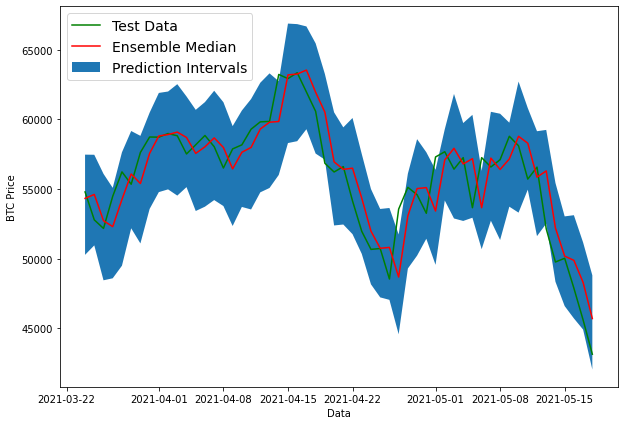

In [162]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot our ensemble preds along with the prediction intervals (which is also an estimates :p)
offset = 500
plt.figure(figsize=(10,7))
# True Label
plt.plot(X_test.index[offset:], y_test[offset:], "g", label='Test Data')
# Predicted Lables
plt.plot(X_test.index[offset:], ensemble_median[offset:],  "-",color='r', label='Ensemble Median')
plt.xlabel('Data')
plt.ylabel('BTC Price')
# Plot the upper and lower boudns using fill_between
plt.fill_between(X_test.index[offset:], (lower)[offset:], (upper)[offset:], label='Prediction Intervals')
plt.legend(loc='upper left', fontsize=14);

**Note** : These prediction intervals are estimates themselves. And they have been created with the assumption that our model's data is from a normal distribution. 

## (OPTIONAL) Uncertainty in Time Series Forecast

Uncertainty estimates in machine learning seek out to qualitatively and quantitatively answer the questions:
1. What can my model know ? (with perfect data, what's possible for a model to learn?)
2. What my model doesn't know? (what can a model never predict? or would it helpful if a model

There are two major types of uncertainty in macine learning:
* **Aleatoric uncertainty** - this type of uncertainty cannot be reduced and it is often referred as data uncertainty or **subway uncertainty**
* **Epistemic uncertainty** - this type of uncertainty can be reduced, it is also referred to as "model" or **coconut uncertainty**


**IMPORTANT NOTE** A Forecaster should be held responsible for both _aleatory_ and _epistemic_ uncertainty.

# Model 9: Train a model on the full historical data to make predictions into the future

so far all of our models have predicted on the test dataset, however, this is only a pseudofuture.



In [163]:
HORIZON = 1
WINDOW_SIZE = 7
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [164]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.26,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.26,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.26,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.26,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.26,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


## Prepare data using `tf.data`

In [165]:
# Data
X_all = bitcoin_prices_windowed.dropna().drop(['Price', 'block_reward'], axis=1).to_numpy()
# Labels
y_all = bitcoin_prices_windowed.dropna()['Price']


In [166]:
len(X_all), len(y_all)

(2780, 2780)

In [167]:
all_features_dataset = tf.data.Dataset.from_tensor_slices(X_all)
all_labels_dataset = tf.data.Dataset.from_tensor_slices(y_all)

# Combine labels and features by zipping together -> (features, labels)
all_dataset = tf.data.Dataset.zip((all_features_dataset, all_labels_dataset))

# BATCH SIZE based on paper

BATCH_SIZE = 1024

# PREFETCH
all_dataset = all_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

all_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [168]:
len(all_dataset)

3

## Build model 9

In [169]:
# Set random seed for a reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear') # linear activation is the same as having no activation
], name='model_9_dense')

# 2. Compile
model_9.compile(loss='mae',
                optimizer='adam',
                metrics=['mae', 'mse'])
# 3. Fit the model
model_9.fit(all_dataset, epochs=100, verbose=1,
            batch_size=128)


Epoch 1/100
3/3 [==============================] - 1s 7ms/step - loss: 3400.4771 - mae: 3400.4773 - mse: 42222040.0000
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 2597.7439 - mae: 2597.7439 - mse: 24829890.0000
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 1782.4928 - mae: 1782.4928 - mse: 11798969.0000
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 963.9218 - mae: 963.9218 - mse: 3748013.5000
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 380.1924 - mae: 380.1924 - mse: 864848.9375
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 596.7660 - mae: 596.7660 - mse: 2090132.1250
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 780.8615 - mae: 780.8615 - mse: 3061157.5000
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 694.8604 - mae: 694.8604 - mse: 2422252.5000
Epoch 9/100
3/3 [==============================] - 0s 6ms/step -

**Source** https://towardsdatascience.com/3-facts-about-time-series-forecasting-that-surprise-experienced-machine-learning-practitioners-69c18ee89387

## Make predictions into future

To make predictions into the future we want need a function which:
1. Takes as input:
  * a list of values (Bitcoin historical data)
  * A trained model (such as `model_9`)
  * a window into the future to predit (our `INTO_FUTURE` variable)
  * a window size a model was t rianed on (`WINDOW_SIZE`) the mdoel can only predict on the same kind of data it was trained on
2. Creates an empty list for future forecasts ( this will be returned at the end of the end, when it's full of predictions) and exstracts the last `WINDOW_SIZE` valuues from the input values
3. Loop `INTO_FUTURE` times making a predic tion on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction

In [170]:
# Future dates we want to predict
INTO_FUTURE = 14 # 2 WEEKS

In [171]:
# Make forecasts into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE)->list:
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  for _ in range(INTO_FUTURE):
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction {tf.squeeze(future_pred).numpy()}\n")

    future_forecast.append(tf.squeeze(future_pred).numpy())

    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  return future_forecast
  

In [172]:
future_forecast = make_future_forecasts(values=y_all, model=model_9, into_future=INTO_FUTURE, window_size=WINDOW_SIZE)

Predicting on:
 Date
2021-05-12    56573.555472
2021-05-13    52147.821187
2021-05-14    49764.132082
2021-05-15    50032.693137
2021-05-16    47885.625255
2021-05-17    45604.615754
2021-05-18    43144.471291
Name: Price, dtype: float64 -> Prediction 54032.69921875

Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 54032.69921875] -> Prediction 50142.13671875

Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 54032.69921875 50142.13671875] -> Prediction 48709.85546875

Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 54032.69921875 50142.13671875 48709.85546875] -> Prediction 48270.546875

Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 54032.69921875
 50142.13671875 48709.85546875 48270.546875  ] -> Prediction 47503.37890625

Predicting on:
 [45604.61575361 43144.47129086 54032.69921875 50142.13671875
 48709.85546875 48270.546875   47503.3789

In [173]:
future_forecast

[54032.7,
 50142.137,
 48709.855,
 48270.547,
 47503.38,
 46399.902,
 47346.883,
 51623.39,
 48837.418,
 48018.145,
 47795.246,
 47633.62,
 47410.473,
 48579.82]

## Plot Future Forecast

In [174]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date + into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date for D onward
  end_date = start_date + np.timedelta64(into_future, "D")

  return np.arange(start_date, end_date, dtype='datetime64[D]') # return a date range

In [175]:
# Last timmestep of timesteps (currently in np.datetimme64 format)
last_timestep = bitcoin_prices.index[-1]
type(last_timestep)

pandas._libs.tslibs.timestamps.Timestamp

In [176]:
# Get next two week of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE
                                  )
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [177]:
bitcoin_prices.index

DatetimeIndex(['2013-10-01', '2013-10-02', '2013-10-03', '2013-10-04',
               '2013-10-05', '2013-10-06', '2013-10-07', '2013-10-08',
               '2013-10-09', '2013-10-10',
               ...
               '2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16',
               '2021-05-17', '2021-05-18'],
              dtype='datetime64[ns]', name='Date', length=2787, freq=None)

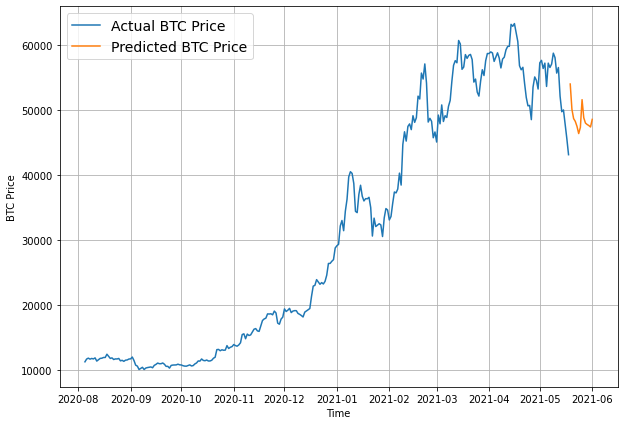

In [178]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format='-', label='Actual BTC Price')
plot_time_series(next_time_steps, future_forecast, format='-', label='Predicted BTC Price')

In [179]:
# Insert last timestep/final price into next time steps
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 54032.7  , 50142.137, 48709.855, 48270.547, 47503.38 ,
        46399.902, 47346.883, 51623.39 , 48837.418, 48018.145, 47795.246,
        47633.62 , 47410.473, 48579.82 ], dtype=float32))

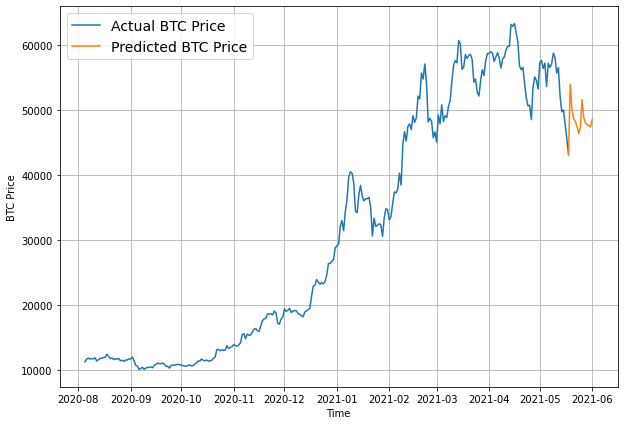

In [180]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format='-', label='Actual BTC Price')
plot_time_series(next_time_steps, future_forecast, format='-', label='Predicted BTC Price')

In [181]:
btc_price[-1]

43144.4712908603

# Model 10 : Forecasting is BS (turkey problem)

In [182]:
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [183]:
btc_price_turkey[-5:]

[49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [184]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-5:]

array(['2021-05-14T00:00:00.000000000', '2021-05-15T00:00:00.000000000',
       '2021-05-16T00:00:00.000000000', '2021-05-17T00:00:00.000000000',
       '2021-05-18T00:00:00.000000000'], dtype='datetime64[ns]')

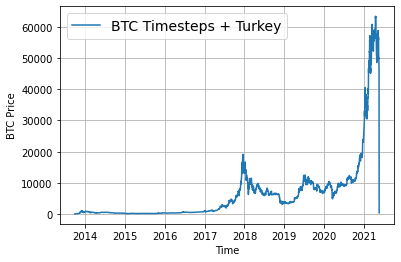

In [185]:
plot_time_series(timesteps=btc_timesteps_turkey, values=btc_price_turkey,format='-',  label='BTC Timesteps + Turkey')

In [186]:
# Create train and test sets for turkey problem data
HORIZON = 1
WINDOW_SIZE = 7
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train) , len(y_train), len(X_test) ,len(y_test)

(2224, 2224, 556, 556)

In [187]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON)
])

model_10.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(), metrics=['mae', 
                                                                            'mse'])

model_10.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
70/70 [==============================] - 1s 8ms/step - loss: 359.4917 - mae: 359.4917 - mse: 780213.8125 - val_loss: 965.1812 - val_mae: 965.1812 - val_mse: 6916707.0000
Epoch 2/100
70/70 [==============================] - 0s 6ms/step - loss: 157.8976 - mae: 157.8976 - mse: 131472.7031 - val_loss: 885.5781 - val_mae: 885.5781 - val_mse: 6440167.5000
Epoch 3/100
70/70 [==============================] - 1s 8ms/step - loss: 147.2009 - mae: 147.2009 - mse: 119701.9141 - val_loss: 855.0188 - val_mae: 855.0188 - val_mse: 5887166.5000
Epoch 4/100
70/70 [==============================] - 0s 3ms/step - loss: 139.5048 - mae: 139.5048 - mse: 104214.2969 - val_loss: 838.1919 - val_mae: 838.1919 - val_mse: 6034114.5000
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 132.6160 - mae: 132.6160 - mse: 97760.8047 - val_loss: 980.8541 - val_mae: 980.8541 - val_mse: 5884300.0000
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 130.8021 - mae: 13

In [188]:
model_10.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 757.4484 - mae: 757.4484 - mse: 4981373.0000


[757.4483642578125, 757.4483642578125, 4981373.0]

In [189]:
model_1_results

{'MAE': 568.95105,
 'MSE': 1171743.8,
 'RMSE': 1082.4711,
 'MAPE': 2.5448983,
 'MASE': 0.9994894}

In [192]:
model_10_preds = tf.squeeze(model_10.predict(X_test))

In [196]:
# model_10_preds

In [195]:
model_10_results = evaluate_preds(y_test, model_10_preds)
model_10_results

{'MAE': 16976.266,
 'MSE': 603175550.0,
 'RMSE': 23404.018,
 'MAPE': 119.12962,
 'MASE': 26.270826}

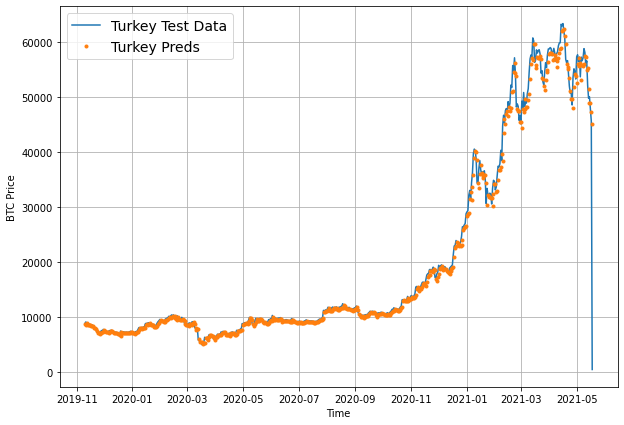

In [197]:
plt.figure(figsize=(10,7))
offset=0
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(X_test):],
                 format='-',
                 label='Turkey Test Data',
                 start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=model_10_preds,
                 label='Turkey Preds',
                 start=offset)

# Compare models

In [201]:
# Compare different model results ( w = window, h = horizon)
model_results = pd.DataFrame({'naive_model': naive_results,
                              'model_1_dense': model_1_results,
                              'model_2_dense_w30_h1': model_2_results,
                              'model_3_dense_w30_h7': model_3_results,
                              'model_4_CONV1D': model_4_results,
                              'model_5_LSTM': model_5_results,
                              'model_6_multivariate': model_6_results,
                              'model_7_NBEATS': model_7_results,
                              'model_8_ensemble': ensemble_results,
                              'model_10_turkey': model_10_results}).T
model_results

,MAE,MSE,RMSE,MAPE,MASE
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense,568.951050,1.171744e+06,1082.471069,2.544898,0.999489
model_2_dense_w30_h1,605.874084,1.273361e+06,1128.432861,2.726445,1.059074
model_3_dense_w30_h7,1237.506348,5.405198e+06,1425.747803,5.558878,2.202073
model_4_CONV1D,570.738770,1.183500e+06,1087.887817,2.546120,1.002630
model_5_LSTM,568.950378,1.174136e+06,1083.575317,2.538134,0.999488
model_6_multivariate,563.143677,1.152499e+06,1073.544922,2.517544,0.989287
model_7_NBEATS,575.372070,1.155772e+06,1075.068481,2.603816,1.010769
model_8_ensemble,565.359497,1.138784e+06,1067.138428,2.561557,0.993180
model_10_turkey,16976.265625,6.031756e+08,23404.017578,119.129623,26.270826


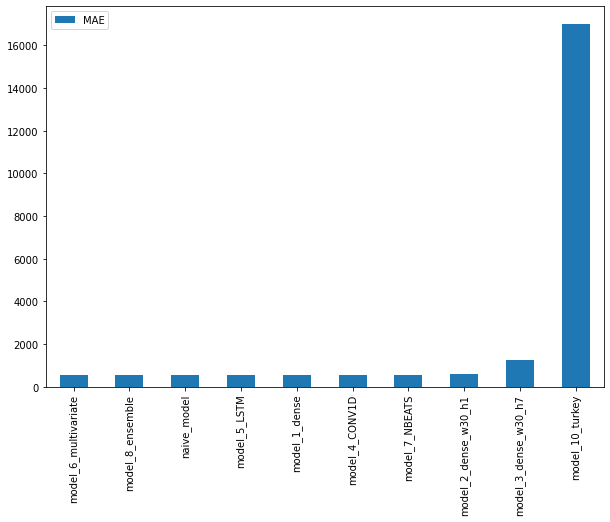

In [203]:
# Sort model results by MAE and plot them
model_results[['MAE']].sort_values('MAE').plot(figsize=(10,7), kind='bar')